In [162]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Taking arbitrary day, route and age and discount value and plot the price changes across a single day

#### 1. Read Data, getting an overview

In [163]:
day = '10_01_2023'
route='berlin-memmingen'
age='E'
discount='1'
tariffClass='1'
path=f'data/{route}/data_{age}_{discount}_{tariffClass}/{day}_{age}_{discount}.csv'

In [164]:
headers = ['price', 'ticket type', 'age', 'discount', 'date', 'departure', 'destination', 'duration', 'start time', 'arrival time', 'changes', 'tariffClass']
df = pd.read_csv(path, skiprows=[0], header=None, names=headers)
df.head()

,price,ticket type,age,discount,date,departure,destination,duration,start time,arrival time,changes,tariffClass
0,"25,40",Super Sparpreis,E,1,"Di.,10.01.2023",Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1
1,"31,40",Sparpreis,E,1,"Di.,10.01.2023",Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1
2,"176,55",Flexpreis,E,1,"Di.,10.01.2023",Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1
3,"197,70",Flexpreis Plus,E,1,"Di.,10.01.2023",Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1
4,"25,40",Super Sparpreis,E,1,"Di.,10.01.2023",Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,6h 31min,04:28,10:59,1,1


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         116 non-null    object
 1   ticket type   116 non-null    object
 2   age           116 non-null    object
 3   discount      116 non-null    int64 
 4   date          116 non-null    object
 5   departure     116 non-null    object
 6   destination   116 non-null    object
 7   duration      116 non-null    object
 8   start time    116 non-null    object
 9   arrival time  116 non-null    object
 10  changes       116 non-null    int64 
 11  tariffClass   116 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 11.0+ KB


#### 2. Clean Data

In [166]:
# drop duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         116 non-null    object
 1   ticket type   116 non-null    object
 2   age           116 non-null    object
 3   discount      116 non-null    int64 
 4   date          116 non-null    object
 5   departure     116 non-null    object
 6   destination   116 non-null    object
 7   duration      116 non-null    object
 8   start time    116 non-null    object
 9   arrival time  116 non-null    object
 10  changes       116 non-null    int64 
 11  tariffClass   116 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 11.8+ KB


In [167]:
# drop tickets of type normalpreis since they only apply to regional trains
df.drop(df[df['ticket type'] == 'Normalpreis'].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         116 non-null    object
 1   ticket type   116 non-null    object
 2   age           116 non-null    object
 3   discount      116 non-null    int64 
 4   date          116 non-null    object
 5   departure     116 non-null    object
 6   destination   116 non-null    object
 7   duration      116 non-null    object
 8   start time    116 non-null    object
 9   arrival time  116 non-null    object
 10  changes       116 non-null    int64 
 11  tariffClass   116 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 11.8+ KB


In [168]:
# parse object types
df.dtypes
# save big df https://stackoverflow.com/questions/17098654/how-to-reversibly-store-and-load-a-pandas-dataframe-to-from-disk

price           object
ticket type     object
age             object
discount         int64
date            object
departure       object
destination     object
duration        object
start time      object
arrival time    object
changes          int64
tariffClass      int64
dtype: object

In [169]:
df['price'] = df['price'].str.replace(',','.')
df['price'] = df['price'].astype(float)
df.dtypes
#df.head()

price           float64
ticket type      object
age              object
discount          int64
date             object
departure        object
destination      object
duration         object
start time       object
arrival time     object
changes           int64
tariffClass       int64
dtype: object

In [170]:
df['date'] = df['date'].str.slice(start=4)
df.head()

,price,ticket type,age,discount,date,departure,destination,duration,start time,arrival time,changes,tariffClass
0,25.40,Super Sparpreis,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1
1,31.40,Sparpreis,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1
2,176.55,Flexpreis,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1
3,197.70,Flexpreis Plus,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1
4,25.40,Super Sparpreis,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,6h 31min,04:28,10:59,1,1


In [171]:
df['datetime dep'] = df['start time'] +'-'+ df['date']
df['datetime arr'] = df['arrival time'] +'-'+ df['date']
df['datetime dep'] = pd.to_datetime(df['datetime dep'], format="%H:%M-%d.%m.%Y")
df['datetime arr'] = pd.to_datetime(df['datetime arr'], format="%H:%M-%d.%m.%Y")
df.head()

,price,ticket type,age,discount,date,departure,destination,duration,start time,arrival time,changes,tariffClass,datetime dep,datetime arr
0,25.40,Super Sparpreis,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00
1,31.40,Sparpreis,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00
2,176.55,Flexpreis,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00
3,197.70,Flexpreis Plus,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00
4,25.40,Super Sparpreis,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,6h 31min,04:28,10:59,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00


In [172]:
df['sub [min]'] = (df['datetime arr'] - df['datetime dep']).astype('timedelta64[m]')
df.head()

,price,ticket type,age,discount,date,departure,destination,duration,start time,arrival time,changes,tariffClass,datetime dep,datetime arr,sub [min]
0,25.40,Super Sparpreis,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0
1,31.40,Sparpreis,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0
2,176.55,Flexpreis,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0
3,197.70,Flexpreis Plus,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,10h 32min,00:22,10:54,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0
4,25.40,Super Sparpreis,E,1,10.01.2023,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,6h 31min,04:28,10:59,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0


In [173]:
# drop unnecessary columns
df = df.drop('date', axis=1)
df = df.drop('duration', axis=1)
df = df.drop('start time', axis=1)
df = df.drop('arrival time', axis=1)
df.head()

,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min]
0,25.40,Super Sparpreis,E,1,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0
1,31.40,Sparpreis,E,1,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0
2,176.55,Flexpreis,E,1,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0
3,197.70,Flexpreis Plus,E,1,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0
4,25.40,Super Sparpreis,E,1,Berlin+Hbf,Bahnhof+ZOB%252C+Memmingen,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0


In [174]:
# change departure and destination to better readable string
df['departure'] = df['departure'].apply(lambda x: 'Berlin' if x == 'Berlin+Hbf' else x)
df['destination'] = df['destination'].apply(lambda x: 'Biberach' if x == 'Biberach%28Ri%C3%9F%29' else x)
df['destination'] = df['destination'].apply(lambda x: 'Memmingen' if x == 'Bahnhof+ZOB%252C+Memmingen' else x)
df.head()

,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min]
0,25.40,Super Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0
1,31.40,Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0
2,176.55,Flexpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0
3,197.70,Flexpreis Plus,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0
4,25.40,Super Sparpreis,E,1,Berlin,Memmingen,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0


#### 3. plot data

In [175]:
df['time'] = pd.to_datetime(df['datetime dep']).dt.strftime('%H:%M')
df.head()

,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min],time
0,25.40,Super Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
1,31.40,Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
2,176.55,Flexpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
3,197.70,Flexpreis Plus,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
4,25.40,Super Sparpreis,E,1,Berlin,Memmingen,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0,04:28


/tmp/ipykernel_30217/2126406055.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)


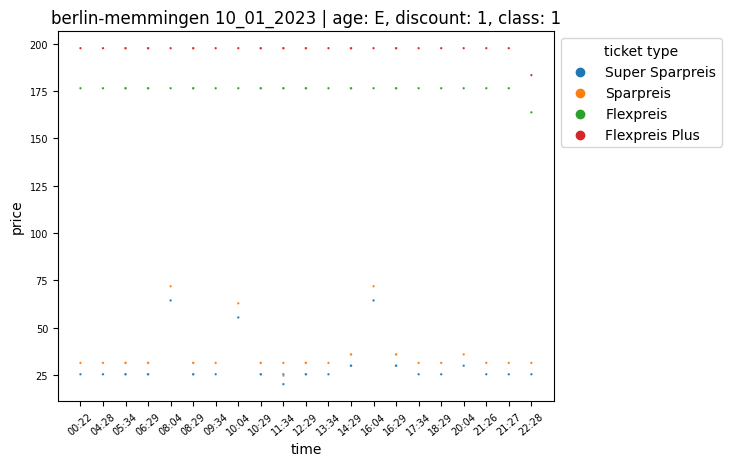

In [184]:
plt = sb.scatterplot(data=df, x='time', y='price', hue='ticket type', s=3)
plt.set_xticklabels(plt.get_xticklabels(),rotation = 40)
plt.tick_params(labelsize=7)
title = f'{route} {day} | age: {age}, discount: {discount}, class: {tariffClass}'
plt.set(title=title)
sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

In [177]:
fig = plt.get_figure()
fig_path = f'plots/{route}/{day}.png'
fig.savefig(fig_path, dpi=200, bbox_inches='tight')

#### 4. Get min and max of different ticket types

In [125]:
df_Flexpreis_plus = df.loc[df['ticket type'] == 'Flexpreis Plus']
flexpreis_plus_min = df_Flexpreis_plus['price'].min()
flexpreis_plus_max = df_Flexpreis_plus['price'].max()
df_Flexpreis = df.loc[df['ticket type'] == 'Flexpreis']
flexpreis_min = df_Flexpreis['price'].min()
flexpreis_max = df_Flexpreis['price'].max()
df_Sparpreis = df.loc[df['ticket type'] == 'Sparpreis']
sparpreis_min = df_Sparpreis['price'].min()
sparpreis_max = df_Sparpreis['price'].max()
df_Super_Sparpreis = df.loc[df['ticket type'] == 'Super Sparpreis']
super_Sparpreis_min = df_Super_Sparpreis['price'].min()
super_Sparpreis_max = df_Super_Sparpreis['price'].max()

min_max_of_day = {
                'ticket types': ['Flexpreis Plus', 'Flexpreis', 'Sparpreis', 'Sparpreis Plus'],
                'min': [flexpreis_plus_min, flexpreis_min, sparpreis_min, super_Sparpreis_min],
                'max': [flexpreis_plus_max, flexpreis_max, sparpreis_max, super_Sparpreis_max]
                }
min_max_of_day = pd.DataFrame(data=min_max_of_day)
min_max_of_day
# also get time 

,ticket types,min,max
0,Flexpreis Plus,183.45,197.70
1,Flexpreis,163.80,176.55
2,Sparpreis,24.65,71.90
3,Sparpreis Plus,20.15,64.40


In [126]:
df

,price,ticket type,age,discount,departure,destination,changes,tariffClass,datetime dep,datetime arr,sub [min],time
0,25.40,Super Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
1,31.40,Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
2,176.55,Flexpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
3,197.70,Flexpreis Plus,E,1,Berlin,Memmingen,2,1,2023-01-10 00:22:00,2023-01-10 10:54:00,632.0,00:22
4,25.40,Super Sparpreis,E,1,Berlin,Memmingen,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0,04:28
5,31.40,Sparpreis,E,1,Berlin,Memmingen,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0,04:28
6,176.55,Flexpreis,E,1,Berlin,Memmingen,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0,04:28
7,197.70,Flexpreis Plus,E,1,Berlin,Memmingen,1,1,2023-01-10 04:28:00,2023-01-10 10:59:00,391.0,04:28
8,25.40,Super Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 05:34:00,2023-01-10 11:48:00,374.0,05:34
9,31.40,Sparpreis,E,1,Berlin,Memmingen,2,1,2023-01-10 05:34:00,2023-01-10 11:48:00,374.0,05:34
